# Integrantes

Fabricio da Costa Fernandes - RA 11202321635

Felipe de Lima Major - RA 11202230321

Lilian Gimenez Teixeira - RA 11202332321

# Equalização de Histograma: Melhoria de Imagens de Baixa Qualidade

A equalização de histograma é uma técnica de processamento de imagens utilizada para melhorar o contraste de imagens, especialmente aquelas consideradas de baixa qualidade (com pouco contraste ou iluminação inadequada). O objetivo é redistribuir os níveis de intensidade dos pixels, tornando o histograma da imagem mais uniforme e, assim, realçando detalhes que estavam pouco visíveis.

Nesta atividade, vamos aplicar a equalização de histograma em três imagens diferentes, analisando os resultados antes e depois do processamento, e discutindo as vantagens e limitações dessa técnica.

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import cv2 as cv
from skimage import io

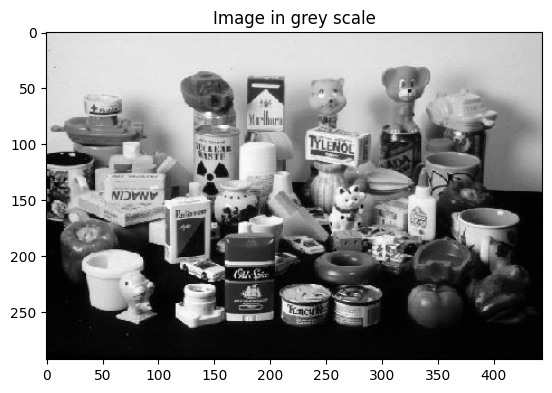

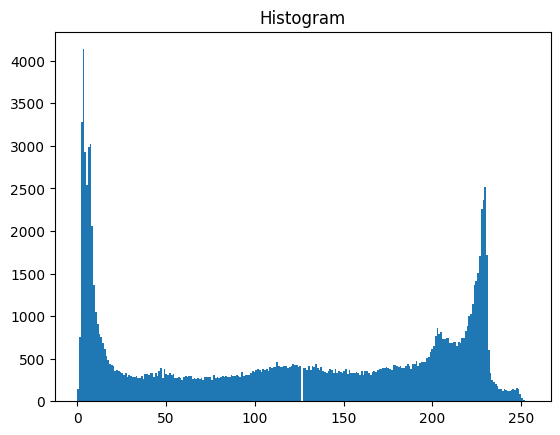

In [ ]:
def changecolor(im):
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    return gray

def printimage(im,title):
  plt.imshow(im, cmap='gray', vmin=0, vmax=255)
  plt.title(title)
  return plt.show()

def printhistogram(im,title):
  plt.hist(im.ravel(), 256)
  plt.title(title)
  return plt.show()

url = "https://www.cs.columbia.edu/CAVE/software/softlib/gif/100objects.jpg"
image = io.imread(url)

gray = changecolor(image)
printimage(gray,"Image in grey scale")
printhistogram(gray,"Histogram")

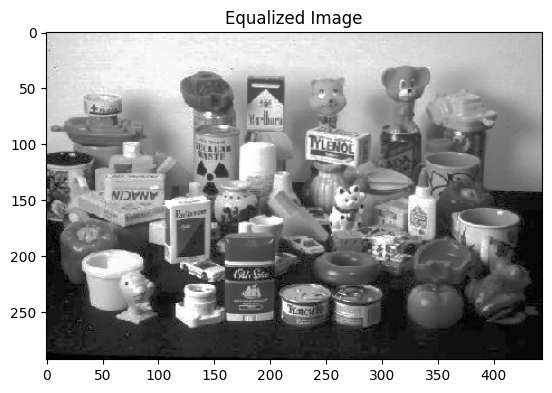

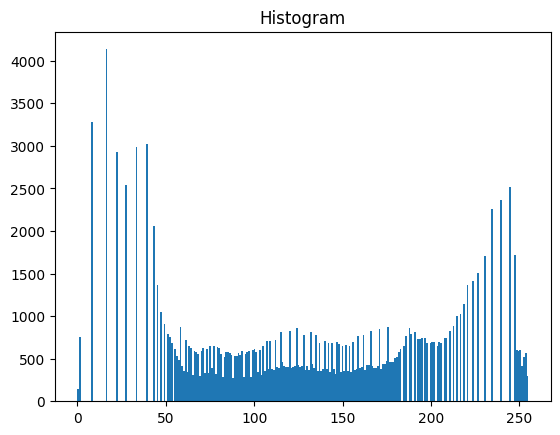

In [ ]:
eq = cv2.equalizeHist(gray)
printimage(eq,"Equalized Image")
printhistogram(eq,"Histogram")

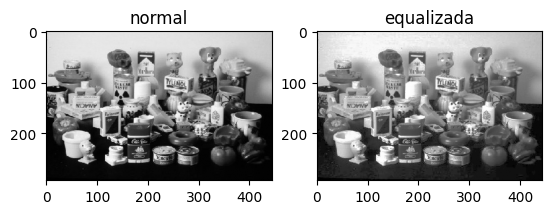

In [ ]:
def comparision(img1,img2,title1,title2):
  plt.subplot(1,2,1)
  plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
  plt.title(title1)
  plt.subplot(1,2,2)
  plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
  plt.title(title2)
  return plt.show()

comparision(gray,eq,"normal","equalizada")

## Análise dos Resultados: Antes e Depois da Equalização

Ao comparar as imagens originais com as imagens após a equalização do histograma, é possível observar:

- **Melhoria do Contraste:** Detalhes que estavam pouco visíveis em regiões escuras ou claras tornam-se mais evidentes.
- **Distribuição dos Tons:** O histograma da imagem equalizada tende a ocupar uma faixa mais ampla de intensidades, tornando a imagem visualmente mais equilibrada.

### Vantagens da Equalização de Histograma
- Realce de detalhes em imagens de baixo contraste.
- Técnica simples e eficiente para melhorar a qualidade visual.
- Pode ser aplicada tanto em imagens em tons de cinza quanto coloridas (canal a canal).

### Limitações
- Pode introduzir artefatos ou exagerar o contraste em algumas regiões.
- Nem sempre é adequada para imagens já bem iluminadas ou com contraste adequado.
- Em imagens coloridas, a equalização separada dos canais pode alterar as cores originais.

**Conclusão:**
A equalização de histograma é uma ferramenta poderosa para melhorar imagens de baixa qualidade, mas deve ser usada com cautela, considerando as características da imagem e o objetivo da aplicação.

# Experimento: Equalização de Histograma em Três Imagens Diferentes

A seguir, cada membro do grupo processa uma imagem diferente, conforme solicitado. O fluxo inclui: 
- Seleção das imagens;
- Mudança da cor para escalas de cinza;
- Equalização dos tons da imagem;
- Comparação entre antes e depois da equalização;
- Demonstração do gráfico do histograma.

In [ ]:
img_url_list= ["https://g1.globo.com/VCnoG1/foto/0,,14342751-EX,00.jpg",
               "https://ichef.bbci.co.uk/images/ic/1200x675/p0f926p1.jpg",
               "https://guidetooilpainting.com/images/basics-contrast/5cast-shadow-low-contrast.jpg"]
for url in img_url_list:
  image = io.imread(url)
  gray = changecolor(image)
  eq = cv2.equalizeHist(gray)
  comparision(gray,eq,"normal","equalizada")
  printhistogram(eq,"Histogram")

## Estudo da Equalização nas Cores (Imagem Colorida)

Nesta etapa do experimento, iremos modificar o procedimento realizado anteriormente (onde a equalização foi aplicada após a conversão para escala de cinza).  

Agora, **não converteremos a imagem para tons de cinza**. Em vez disso, a equalização de histograma será aplicada **separadamente em cada um dos três canais de cor (R, G e B)**.  

O objetivo é analisar como a equalização afeta imagens coloridas quando aplicada individualmente em cada canal e, posteriormente, recombinar esses canais para gerar a imagem colorida final equalizada.

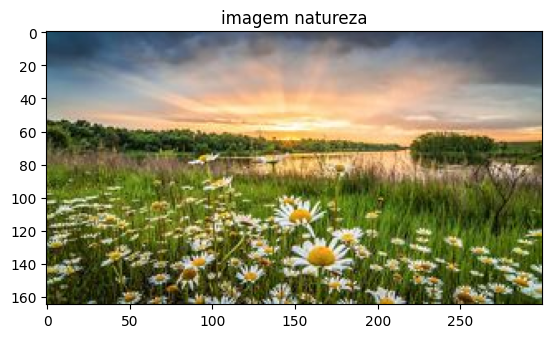

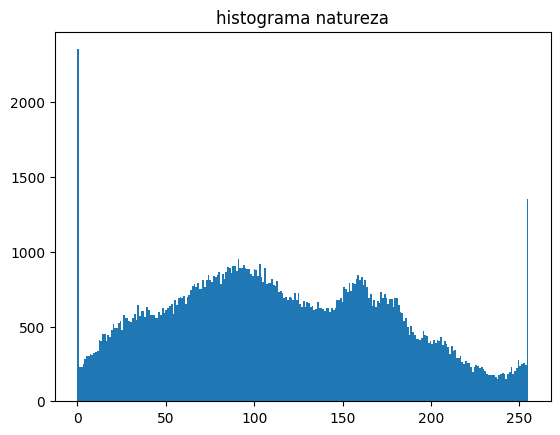

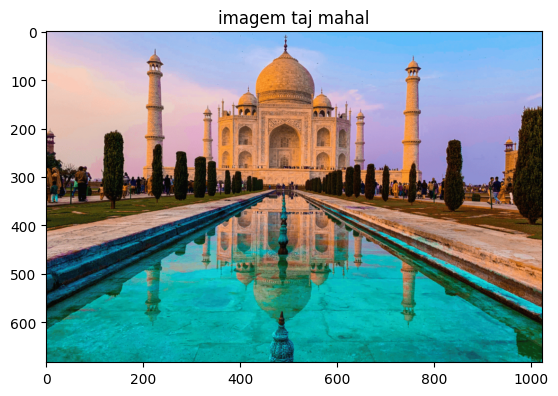

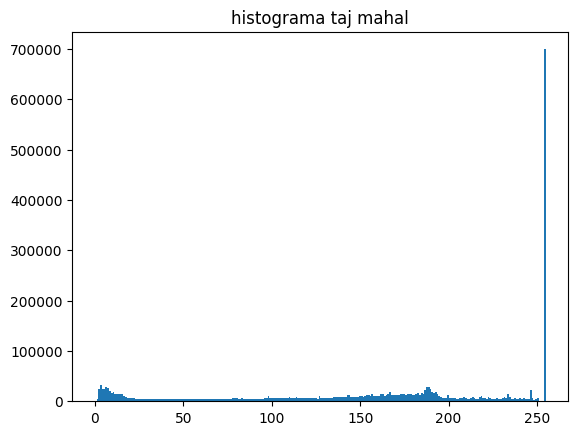

In [ ]:
img = io.imread("https://natureconservancy-h.assetsadobe.com/is/image/content/dam/tnc/nature/en/photos/t/n/tnc_52987642_Full.jpg?crop=0%2C233%2C4000%2C2200&amp;wid=1300&amp;hei=715&amp;scl=3.076923076923077")
printimage(img, "imagem natureza")
printhistogram(img, "histograma natureza")

img2 = io.imread("https://site.awacomercial.com.br/wp-content/uploads/2024/02/Taj-Mahal-1024x683.png")
printimage(img2, "imagem taj mahal")
printhistogram(img2, "histograma taj mahal")


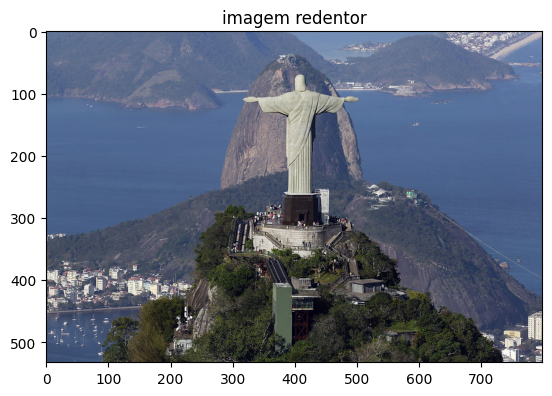

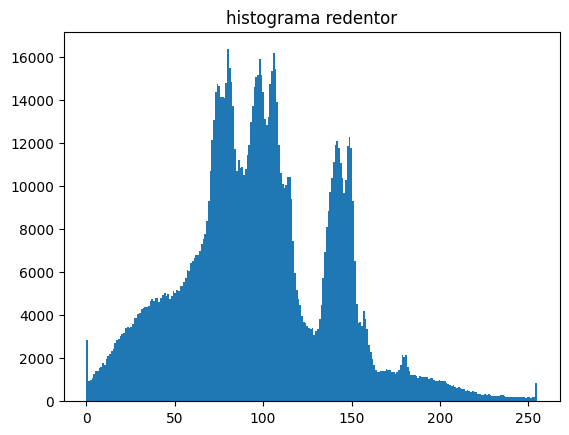

In [ ]:
img3 = io.imread("https://prefeitura.rio/wp-content/uploads/2021/10/Cristo-DePaula-2.jpg")
printimage(img3, "imagem redentor")
printhistogram(img3, "histograma redentor")

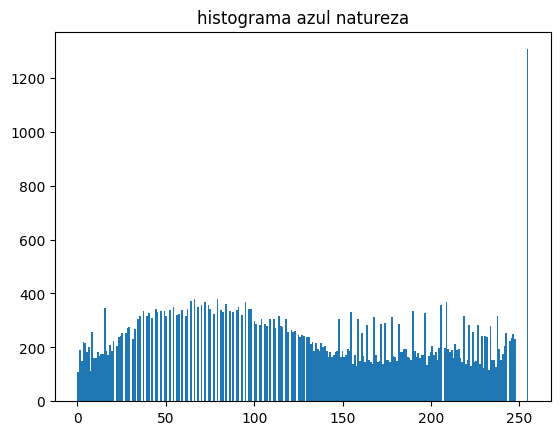

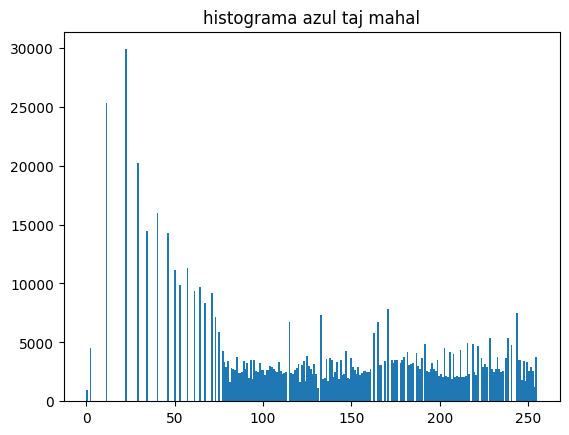

In [ ]:
bgr_planos = cv2.split(img) #separando os planos bgr
equalizado_b = cv2.equalizeHist(bgr_planos[0]) # equalizando o plano azul
printhistogram(equalizado_b, "histograma azul natureza")

bgr_planos2 = cv2.split(img2) #separando os planos bgr
equalizado_b2 = cv2.equalizeHist(bgr_planos2[0]) # equalizando o plano azul
printhistogram(equalizado_b2, "histograma azul taj mahal")



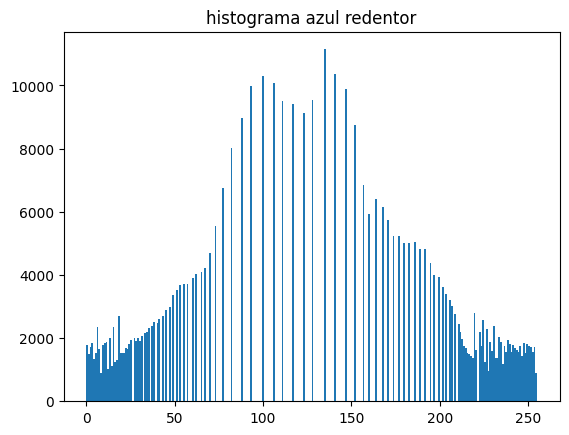

In [ ]:
bgr_planos3 = cv2.split(img3)
equalizado_b3 = cv2.equalizeHist(bgr_planos3[0])
printhistogram(equalizado_b3, "histograma azul redentor")

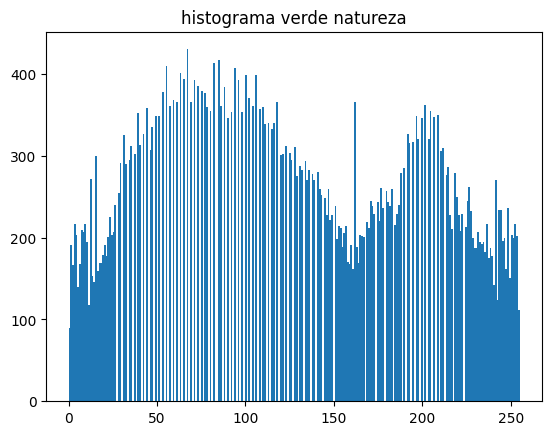

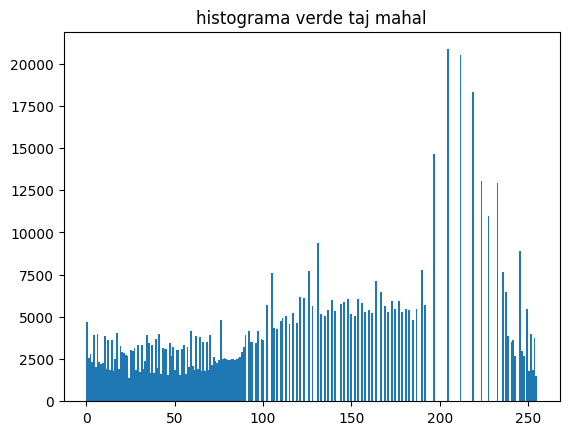

In [ ]:
equalizado_g = cv2.equalizeHist(bgr_planos[1]) #equalizando plano verde
printhistogram(equalizado_g, "histograma verde natureza")

equalizado_g2 = cv2.equalizeHist(bgr_planos2[1]) #equalizando plano verde
printhistogram(equalizado_g2, "histograma verde taj mahal")

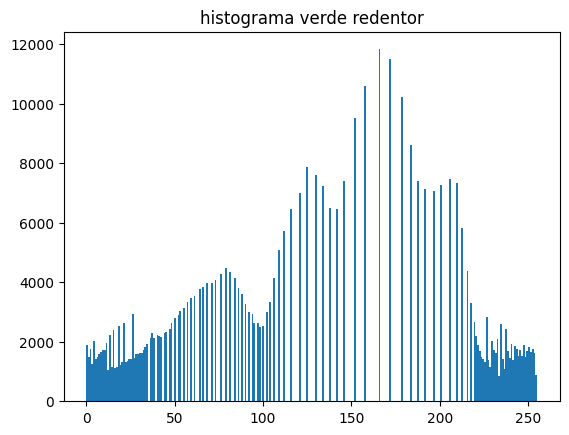

In [ ]:
equalizado_g3 = cv2.equalizeHist(bgr_planos3[1]) #equalizando plano verde
printhistogram(equalizado_g3, "histograma verde redentor")

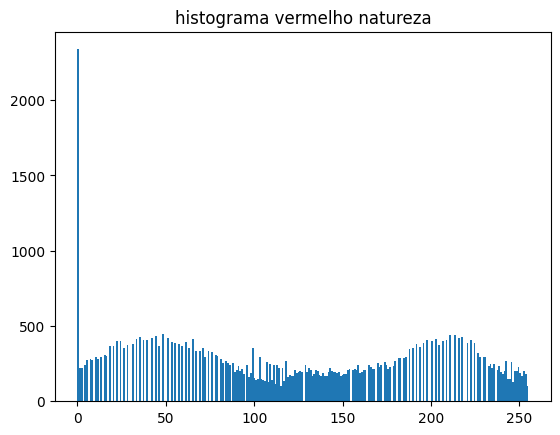

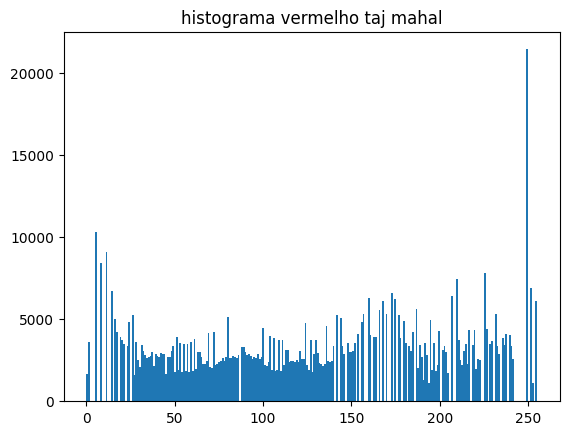

In [ ]:
equalizado_r = cv2.equalizeHist(bgr_planos[2]) #equalizando plano vermelho
printhistogram(equalizado_r, "histograma vermelho natureza")

equalizado_r2 = cv2.equalizeHist(bgr_planos2[2]) #equalizando plano vermelho
printhistogram(equalizado_r2, "histograma vermelho taj mahal")


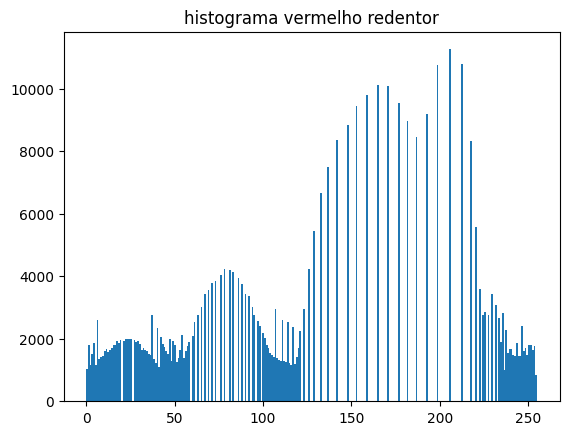

In [ ]:
equalizado_r3 = cv2.equalizeHist(bgr_planos3[2]) #equalizando plano vermelho
printhistogram(equalizado_r3, "histograma vermelho redentor")

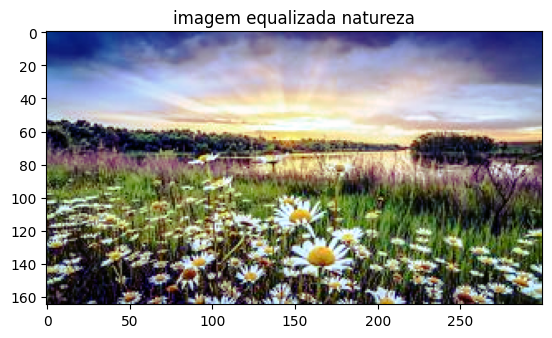

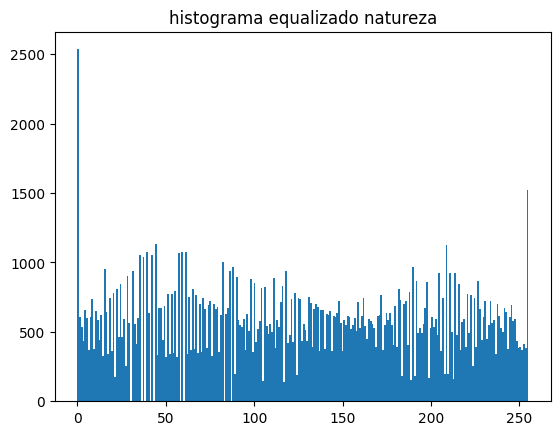

In [ ]:
#juntando os canais equalizados na imagem colorida de saída

img_equalizada = cv2.merge((equalizado_b, equalizado_g, equalizado_r))
printimage(img_equalizada, "imagem equalizada natureza")
printhistogram(img_equalizada, "histograma equalizado natureza")


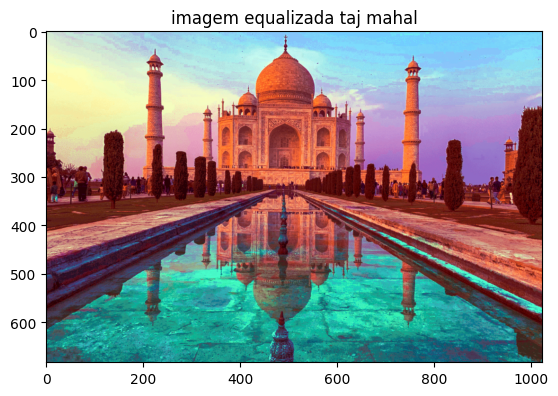

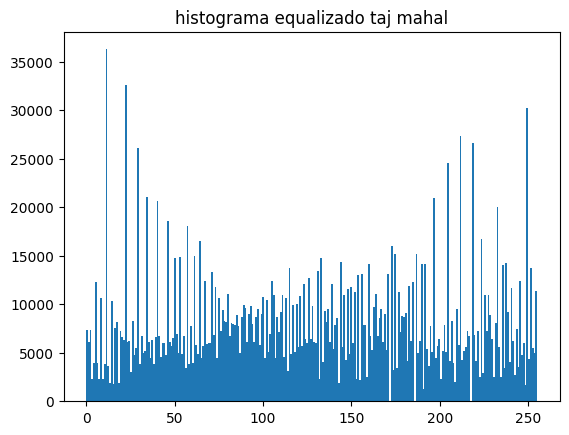

In [ ]:
img_equalizada2 = cv2.merge((equalizado_b2, equalizado_g2, equalizado_r2))
printimage(img_equalizada2, "imagem equalizada taj mahal")
printhistogram(img_equalizada2, "histograma equalizado taj mahal")


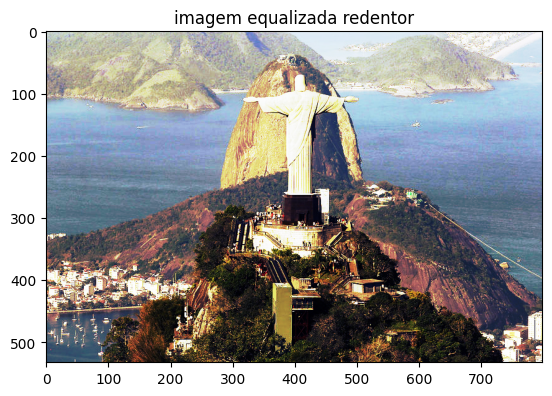

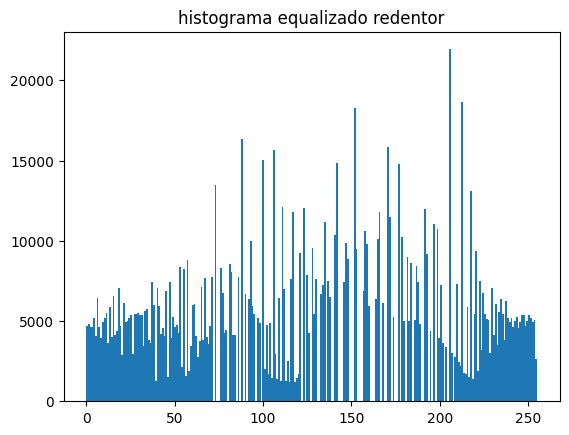

In [ ]:
img_equalizada3 = cv2.merge((equalizado_b3, equalizado_g3, equalizado_r3))
printimage(img_equalizada3, "imagem equalizada redentor")
printhistogram(img_equalizada3, "histograma equalizado redentor")

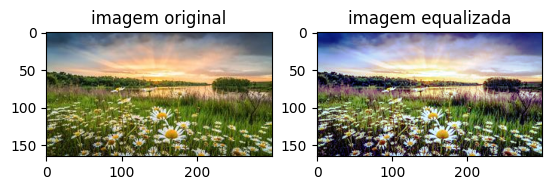

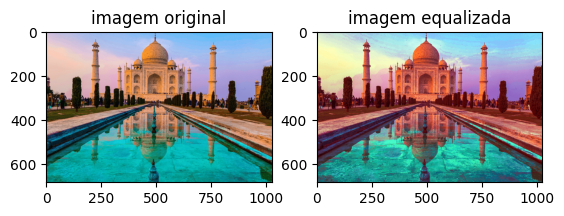

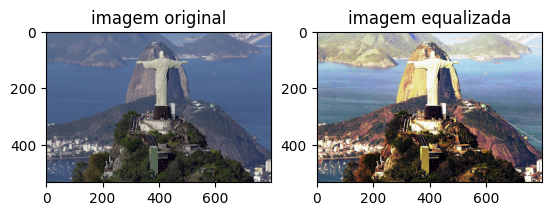

In [82]:
comparision(img,img_equalizada,"imagem original","imagem equalizada")
comparision(img2,img_equalizada2,"imagem original","imagem equalizada")
comparision(img3,img_equalizada3,"imagem original","imagem equalizada")

In [ ]:
#Compare e analise o efeito sem e com a equalização de histograma no resultado da imagem colorida gerada e no histograma.

# Os histogramas das imagens equalizadas ficaram mais distribuídas fazendo com que houvesse um maior contraste das imagens
# Isso faz com que aumente o nível de detalhes das imagens.